# MOHID visualisation tools

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from mohid_viz.vertical_velocities import vertical_velocities as w_vel, salinity, velocity

<h2>Using mohid_viz.vertical_velocities to generate heat maps of vertical velocities</h2>

<h3>Plotting time and depth slices in one line with time parsing</h3>

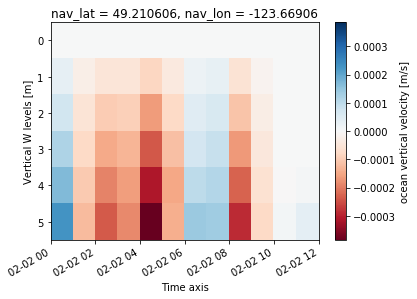

In [2]:
"""
xr_path: str, path of netcdf file
begin: beginning time, optional 
end:  end time, optional
top: index of top depth layer to slice by, optional. int [0,39]
bottom: index of bottom depth layer to slice by, optional. int [0,39]
plot_max: still working on this one
"""

# top six layers from 2 Feb 2015 00:00 to 2 Feb 2015 12:00
a_slice = w_vel('Vertical_velocity_profiles/sog2015.nc', top = 0, bottom = 6, begin = '2 feb 2015 00:00', end = '2 Feb 2015 12:00')

<h3>Extracting the data you just visualised</h3>

In [3]:
a_slice.data()

<xarray.DataArray 'vovecrtz' (time_counter: 12, depthw: 6)>
array([[ 2.127669e-09,  3.561978e-05,  7.383771e-05,  1.174551e-04,
         1.712857e-04,  2.309897e-04],
       [ 2.972430e-09, -2.676817e-05, -5.280766e-05, -7.768244e-05,
        -1.007696e-04, -1.227476e-04],
       [ 2.911832e-09, -4.990362e-05, -9.872800e-05, -1.459655e-04,
        -1.918735e-04, -2.370951e-04],
       [ 2.292880e-09, -4.836560e-05, -9.301616e-05, -1.313915e-04,
        -1.621696e-04, -1.850976e-04],
       [ 2.110558e-09, -8.227108e-05, -1.624838e-04, -2.391832e-04,
        -3.120320e-04, -3.848440e-04],
       [ 2.207844e-09, -3.885835e-05, -7.753752e-05, -1.153559e-04,
        -1.477138e-04, -1.402367e-04],
       [ 2.345612e-09,  2.269702e-05,  4.577079e-05,  7.020041e-05,
         1.002583e-04,  1.433576e-04],
       [ 2.514626e-09,  3.088054e-05,  6.054356e-05,  8.814631e-05,
         1.132800e-04,  1.354900e-04],
       [ 2.185586e-09, -5.488929e-05, -1.105698e-04, -1.675093e-04,
        -2.26047

<h3>Visualising all sorts of different slice regimes in subplots</h3>

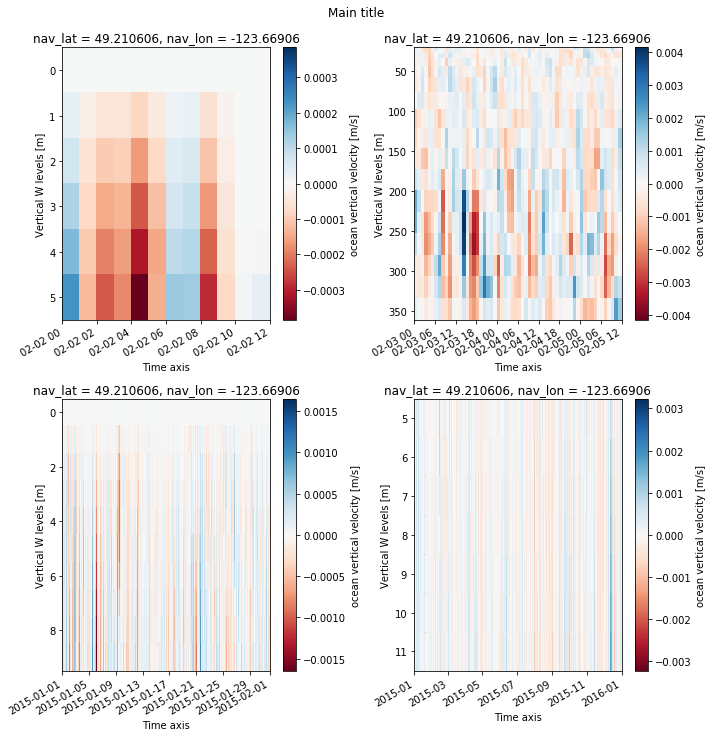

In [4]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(2,2,1)
a = w_vel('Vertical_velocity_profiles/sog2015.nc', top = 0, bottom = 6, begin = '2 feb 2015 00:00', end = '2 Feb 2015 12:00')
ax1 = plt.subplot(2,2,2)
a = w_vel('Vertical_velocity_profiles/sog2015.nc', top = 20, begin = '3 feb 2015 00:00', end = '5 Feb 2015 12:00')
ax2 = plt.subplot(2,2,3)
a = w_vel('Vertical_velocity_profiles/sog2015.nc', bottom = 10, begin = '1 Jan 2015', end = '1 Feb 2015')
ax3 = plt.subplot(2,2,4)
a = w_vel('Vertical_velocity_profiles/sog2015.nc', top = 5, bottom = 12, begin = None, end = None)
plt.suptitle('Main title', y=1.02)
plt.tight_layout()

<h2>Using mohid_viz.salinity to generate heat maps of Salinity</h2>

<h3>Plotting time and depth slices with time parsing</h3>

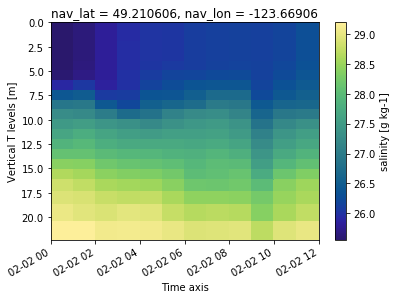

In [5]:
"""
xr_path: str, path of netcdf file
begin: beginning time, optional 
end:  end time, optional
top: index of top depth layer to slice by, optional. int [0,39]
bottom: index of bottom depth layer to slice by, optional. int [0,39]
plot_max: still working on this one
"""

# top 20 layers from 2 Feb 2015 00:00 to 2 Feb 2015 12:00
a_slice = salinity('salinity_profiles/salinity_sog2015.nc', top = 0, bottom = 20, begin = '2 feb 2015 00:00', end = '2 Feb 2015 12:00')

<h3>Extracting the data</h3>

In [6]:
a_slice.data()

<xarray.DataArray 'vosaline' (time_counter: 12, deptht: 20)>
array([[25.56348 , 25.562986, 25.56191 , ..., 28.92162 , 29.032122, 29.191628],
       [25.657684, 25.657825, 25.65805 , ..., 28.885954, 28.955263, 29.18216 ],
       [25.814634, 25.814934, 25.81549 , ..., 28.76758 , 28.90246 , 29.09029 ],
       ...,
       [26.136497, 26.137033, 26.138052, ..., 28.245539, 28.371223, 28.708757],
       [26.178885, 26.179392, 26.180515, ..., 28.480856, 28.589052, 28.927477],
       [26.304537, 26.305092, 26.306284, ..., 28.583792, 28.72998 , 29.01589 ]],
      dtype=float32)
Coordinates:
    nav_lat        float32 ...
    nav_lon        float32 ...
  * deptht         (deptht) float32 0.5000003 1.5000031 ... 19.481785 21.389978
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2015-02-02T00:30:00 ... 2015-02-02T11:30:00
Attributes:
    standard_name:       sea_water_reference_salinity
    long_name:           salinity
    units:              

<h2>Using mohid_viz.velocity to generate heat maps of U current velocities</h2>

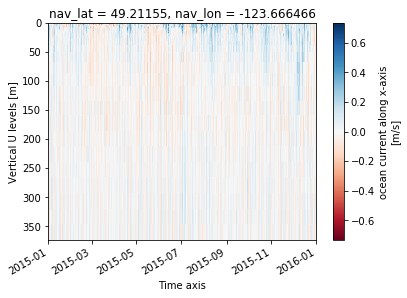

In [7]:
velocity('current_u/sog2015.nc')

<h2>Using mohid_viz.velocity to generate heat maps of V current velocities</h2>

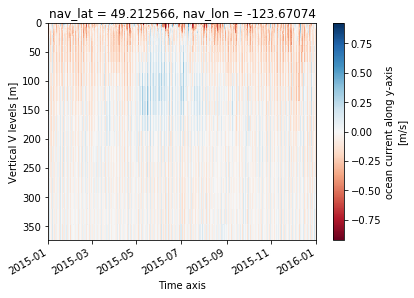

In [8]:
velocity('current_v/sog2015.nc')